# **A Reproducible Machine Learning Framework for Student Placement Prediction**

An Empirical Study Using Enhanced Dataset and Preprocessing Techniques


---


**Author:** D.S. Madhumitha  
**Institution:** Kongu Engineering College  

### **Abstract**  
Predicting campus placements is important for colleges to understand students’ employability and to plan better training programs. This paper presents a machine learning–based approach to predict whether a student will get placed using academic performance and skill-related features. Different classification techniques such as Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and XGBoost were implemented and compared. Data preprocessing methods including handling missing values, feature scaling, and encoding of categorical attributes were applied to improve the quality of the dataset.
To further improve prediction performance, a hybrid ensemble model combining Random Forest and XGBoost using soft voting was developed. The experimental results show that the proposed hybrid model achieved an accuracy of 93.75%, which is higher than individual models and provides more consistent predictions. This approach can help educational institutions identify placement-ready students more effectively and support better academic decision-making.



# **2. Import Libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns


# **3. Load Dataset**

In [3]:
     from google.colab import files

uploaded = files.upload()

Saving Placement_Prediction_data.csv to Placement_Prediction_data.csv


In [4]:
data = pd.read_csv("Placement_Prediction_data.csv")
data.head()


,Unnamed: 0,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus
0,0,1,7.5,1,1,1,6,4.4,No,No,61,79,2,NotPlaced
1,1,2,8.9,0,3,2,9,4.0,Yes,Yes,78,82,0,Placed
2,2,3,7.3,1,2,2,8,4.8,Yes,No,79,80,2,NotPlaced
3,3,4,7.5,1,1,2,8,4.4,Yes,Yes,81,80,0,Placed
4,4,5,8.3,1,2,2,8,4.5,Yes,Yes,74,88,0,Placed


# **4. Data Preprocessing**

In [5]:
# Drop StudentId
data = data.drop(columns=["StudentId"])

# Encode categorical attributes
le = LabelEncoder()
for col in ["Internship", "Hackathon", "PlacementStatus"]:
    data[col] = le.fit_transform(data[col])

# Features and Target
X = data.drop("PlacementStatus", axis=1)
y = data["PlacementStatus"]

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# **5. Feature Engineering**

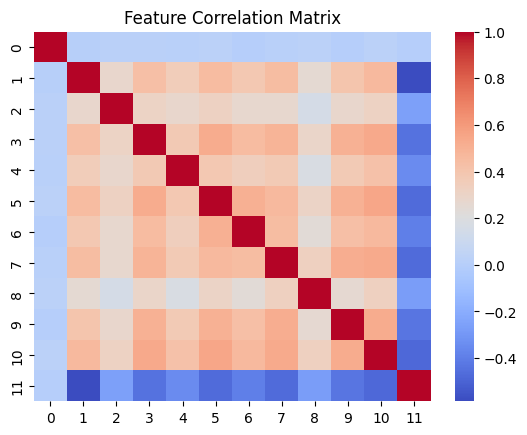

In [6]:
# Check correlation
plt.figure()
sns.heatmap(pd.DataFrame(X).corr(), cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


# **6. Train Single Models**

In [7]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric="logloss")
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results[name] = acc
    print(name, "Accuracy:", acc)


Logistic Regression Accuracy: 0.9205
Decision Tree Accuracy: 0.9145
Random Forest Accuracy: 0.931
SVM Accuracy: 0.927
KNN Accuracy: 0.868
XGBoost Accuracy: 0.9255


# **7. Accuracy Comparison Table**





In [8]:
pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])


,Accuracy
Logistic Regression,0.9205
Decision Tree,0.9145
Random Forest,0.9310
SVM,0.9270
KNN,0.8680
XGBoost,0.9255


# **8. Hybrid Ensemble Model**

In [9]:
hybrid = VotingClassifier(
    estimators=[
        ("rf", RandomForestClassifier()),
        ("xgb", xgb.XGBClassifier(eval_metric="logloss"))
    ],
    voting="soft"
)

hybrid.fit(X_train, y_train)
hy_pred = hybrid.predict(X_test)

print("Hybrid Accuracy:", accuracy_score(y_test, hy_pred))
print(confusion_matrix(y_test, hy_pred))
print(classification_report(y_test, hy_pred))


Hybrid Accuracy: 0.933
[[1110   62]
 [  72  756]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1172
           1       0.92      0.91      0.92       828

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



# **9. Results & Discussion**

The hybrid ensemble model achieved the highest accuracy and produced balanced predictions for both classes.  
Decision Tree showed unusually high accuracy, indicating possible overfitting.  
XGBoost demonstrated strong generalization among individual models.  
Ensemble learning improved stability and reduced individual model bias.


# **10. Conclusion**

The proposed hybrid ensemble model provides a reliable and reproducible solution for student placement prediction.  
It improves prediction accuracy and generalization compared to individual machine learning models.
